# Bird Strikes

_Nafisur Rahman, nafisur.rahman21@gmail.com_



## Introduction <a name='Introduction'></a>
In this section, damaging/non-damaging bird strikes will be classified using six models including Logistic Regression, K-Nearest Neighbors, Support Vector Machines,Gaussian Naive Bayes,Decision Tree and Random Forests. Training accuracy, testing accuracy, cross-validation accuracy and F1_scores will be used to check the fit of the model.


### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from sklearn.metrics import confusion_matrix as cm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
%matplotlib inline
pd.set_option('display.max_columns', 100)

###  Importing the dataset

The bird strikes data set is imported into Python.

In [2]:
bird=pd.read_csv("Bird Strikes Test.csv", low_memory=False, thousands=',')
# only drop rows,column that are all NA:
bird = bird.dropna(axis=0,how='all')
bird = bird.dropna(axis=1,how='all')

### Looking at the dataset

take a look at the first 5 rows of data

In [3]:
bird.head()

,Airport: Name,Altitude bin,Aircraft: Make/Model,Effect: Impact to flight,FlightDate,Record ID,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,When: Phase of flight,Wildlife: Size,Wildlife: Species,When: Time (HHMM),When: Time of day,Pilot warned of birds or wildlife?,Cost: Aircraft time out of service (hours),Cost: Other (inflation adj),Cost: Repair (inflation adj),Cost: Total $,Miles from airport,Feet above ground,Speed (IAS) in knots
0,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,A-319,NaN,1/1/2005 0:00,227413,No damage,2,NORTHWEST AIRLINES,Michigan,Climb,Medium,Unknown bird - medium,NaN,NaN,NaN,NaN,0,0,0,NaN,400.0,NaN
1,DANE COUNTY REGIONAL ARPT-TRUAX FLD,< 1000 ft,A-320,NaN,1/1/2005 0:00,226578,No damage,2,NORTHWEST AIRLINES,Wisconsin,Take-off run,Medium,Unknown bird - medium,NaN,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN
2,HOGUE ARPT,< 1000 ft,PA-46 MALIBU,NaN,1/1/2005 0:00,268383,Caused damage,1,PRIVATELY OWNED,Tennessee,Landing Roll,Large,White-tailed deer,NaN,Day,NaN,NaN,0,0,0,0.0,0.0,20.0
3,SACRAMENTO INTL,< 1000 ft,B-737-300,None,1/1/2005 0:00,229514,Caused damage,2,SOUTHWEST AIRLINES,California,Approach,Large,Greater white-fronted goose,2140.0,Night,Y,NaN,0,117135,117135,NaN,500.0,142.0
4,GUARULHOS INTL,< 1000 ft,B-767-300,NaN,1/1/2005 0:00,225661,No damage,2,UNITED AIRLINES,NaN,Landing Roll,Medium,Unknown bird - medium,NaN,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN


check the number of entries and data type for each variable

In [4]:
bird.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65610 entries, 0 to 65609
Data columns (total 23 columns):
Airport: Name                                 65601 non-null object
Altitude bin                                  65610 non-null object
Aircraft: Make/Model                          65610 non-null object
Effect: Impact to flight                      36516 non-null object
FlightDate                                    65610 non-null object
Record ID                                     65610 non-null int64
Effect: Indicated Damage                      65610 non-null object
Aircraft: Number of engines?                  42766 non-null object
Aircraft: Airline/Operator                    65610 non-null object
Origin State                                  59163 non-null object
When: Phase of flight                         41051 non-null object
Wildlife: Size                                56684 non-null object
Wildlife: Species                             65593 non-null object
When: Ti

From the above information, we can see that this is a relatively large data set with 65610 entries, with tons of missing data. There are 6 major components in the data, including aircraft information, bird information, flight information, time, location, and outcome. The list below outlines the variables that will be examined for each component.

1. aircraft information (including _Aircraft: Make/Model_, _Aircraft: Number of engines_, and _Aircraft: Airline/Operator_)
2. bird information (including _Wildlife: Size_, and _Wildlife: Species_)
3. flight information (including _When: Phase of flight_, _Miles from airport_, _Feet above ground_, and _Speed (IAS) in knots_)
4. time (_FlightDate_ and _When: Time (HHMM)_)
5. location (_Airport: Name_)
6. outcome (_Cost: Total \$_ and _Effect: Indicated Damage_) 



The columns which represent interger or float but in the dataset it is showing object type. Then we can convert it using .astype('f') for float datatype.

In [5]:
bird[['Cost: Total $','Cost: Repair (inflation adj)','Cost: Other (inflation adj)',
      'Cost: Aircraft time out of service (hours)',
     'Miles from airport',
     'Feet above ground',
     'Speed (IAS) in knots']]=bird[['Cost: Total $','Cost: Repair (inflation adj)','Cost: Other (inflation adj)',
      'Cost: Aircraft time out of service (hours)',
     'Miles from airport',
     'Feet above ground',
     'Speed (IAS) in knots']].astype('f')

get a quick description of non-null numeric values in the data

In [6]:
bird.drop(['Record ID'], axis=1).describe()

,When: Time (HHMM),Cost: Aircraft time out of service (hours),Cost: Other (inflation adj),Cost: Repair (inflation adj),Cost: Total $,Miles from airport,Feet above ground,Speed (IAS) in knots
count,36636.000000,4363.000000,6.561000e+04,6.561000e+04,6.561000e+04,37867.000000,35069.000000,25315.000000
mean,1389.074271,66.022003,3.638848e+02,4.170667e+03,4.534549e+03,0.756544,879.610718,151.563660
std,613.410508,328.538727,2.449668e+04,1.888597e+05,1.929630e+05,7.585787,1843.752930,267.404846
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,915.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,120.000000
50%,1410.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,50.000000,140.000000
75%,1930.000000,12.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,900.000000,160.000000
max,2359.000000,6480.000000,5.856751e+06,3.794880e+07,3.794880e+07,1300.000000,31300.000000,9999.000000


### Working with Date and Time

The flight date variable is engineered into two features: the year of the flight and the month of the flight. Year information can be used to understand the trend of bird strikes over time, while the month information along with migration input can be used to understand whether bird migration plays a key role in bird strikes.

A new column "Flight Month" is included in the dataset which reperesent month variable

In [7]:
# month variable
bird['Flight Month'] = pd.DatetimeIndex(bird['FlightDate']).month
pd.DataFrame({'count' : bird.groupby( ['Flight Month'] ).size()}).reset_index()

,Flight Month,count
0,1,2187
1,2,1943
2,3,3269
3,4,4993
4,5,6521
5,6,5234
6,7,8383
7,8,9318
8,9,8703
9,10,8081


Another new column "Flight Year" is included in the dataset which reperesent year variable

In [8]:
# year variable
bird['Flight Year'] = pd.DatetimeIndex(bird['FlightDate']).year
pd.DataFrame({'count' : bird.groupby( ['Flight Year'] ).size()}).reset_index()

,Flight Year,count
0,2005,7804
1,2006,8010
2,2007,8746
3,2008,8903
4,2009,10741
5,2010,10923
6,2011,10483


In this Machine Learning project, we have to classify whether a aircraft is damage or not by a bird strikes. So I are going to add a new column called "Damage" which represent 0 and 1. 1 represent any damage or negative impact to the flight.  

In [9]:
# add damage index
bird['Damage'] = 0
bird.loc[(bird['Effect: Indicated Damage'] != 'No damage') | 
                    (bird['Cost: Total $'] > 0) ,'Damage'] = 1


### Features selection

defining independent and dependent variables

In [10]:
col_selected = ['Aircraft: Number of engines?',
     'Wildlife: Size',
     'When: Phase of flight','Feet above ground','Miles from airport','Speed (IAS) in knots',
     'Flight Month','Flight Year','When: Time of day',
     'Pilot warned of birds or wildlife?','Damage']
col_selected

['Aircraft: Number of engines?',
 'Wildlife: Size',
 'When: Phase of flight',
 'Feet above ground',
 'Miles from airport',
 'Speed (IAS) in knots',
 'Flight Month',
 'Flight Year',
 'When: Time of day',
 'Pilot warned of birds or wildlife?',
 'Damage']

DataFrame with selected columns

In [11]:
df=bird[col_selected]
df.head()

,Aircraft: Number of engines?,Wildlife: Size,When: Phase of flight,Feet above ground,Miles from airport,Speed (IAS) in knots,Flight Month,Flight Year,When: Time of day,Pilot warned of birds or wildlife?,Damage
0,2,Medium,Climb,400.0,NaN,NaN,1,2005,NaN,NaN,0
1,2,Medium,Take-off run,0.0,0.0,NaN,1,2005,NaN,NaN,0
2,1,Large,Landing Roll,0.0,0.0,20.0,1,2005,Day,NaN,1
3,2,Large,Approach,500.0,NaN,142.0,1,2005,Night,Y,1
4,2,Medium,Landing Roll,0.0,0.0,NaN,1,2005,NaN,NaN,0


### Handling Missing Data

Number of missing data in each columns

In [12]:
df.isnull().sum()

Aircraft: Number of engines?          22844
Wildlife: Size                         8926
When: Phase of flight                 24559
Feet above ground                     30541
Miles from airport                    27743
Speed (IAS) in knots                  40295
Flight Month                              0
Flight Year                               0
When: Time of day                     23752
Pilot warned of birds or wildlife?    37249
Damage                                    0
dtype: int64

removing all the missing data 

In [13]:
df=df.dropna()
df

,Aircraft: Number of engines?,Wildlife: Size,When: Phase of flight,Feet above ground,Miles from airport,Speed (IAS) in knots,Flight Month,Flight Year,When: Time of day,Pilot warned of birds or wildlife?,Damage
5,4,Large,Take-off run,0.0,0.0,100.0,1,2005,Day,Y,1
9,2,Medium,Landing Roll,0.0,0.0,100.0,1,2005,Day,N,0
21,2,Small,Take-off run,0.0,0.0,100.0,1,2005,Day,N,0
40,2,Small,Take-off run,0.0,0.0,115.0,1,2005,Dusk,Y,0
54,2,Small,Landing Roll,0.0,0.0,120.0,1,2005,Day,N,0
59,2,Medium,Landing Roll,0.0,0.0,130.0,1,2005,Day,N,0
80,2,Small,Landing Roll,0.0,0.0,90.0,1,2005,Day,Y,0
106,2,Medium,Take-off run,0.0,0.0,140.0,1,2005,Day,Y,0
141,2,Small,Landing Roll,0.0,0.0,120.0,1,2005,Day,N,0
152,2,Small,Take-off run,0.0,0.0,100.0,1,2005,Day,N,0


## Sample data to balance classes

As we explored above, our data is disproportionally full of not damage rows.  Let's create two datasets: one with just the damage rows (`bird_dmg`) and one with safe rows (`bird_safe`).

In [14]:
bird_dmg = df[df['Damage'] == 1]
bird_safe = df[df['Damage'] == 0]
print ("Number of aircraft damage or negative impact by birds  : %s" % len(bird_dmg))
print ("Number of aircraft not impacted by bird stricks : %s" % len(bird_safe))

Number of aircraft damage or negative impact by birds  : 920
Number of aircraft not impacted by bird stricks : 7864


In [15]:
print ("Percentage of aircraft damage or negative impact by birds  :", (float(len(bird_dmg)*100))/(len(bird_dmg) + len(bird_safe)))
print ("Percentage of aircraft not impacted by bird stricks :", (float(len(bird_safe)*100))/(len(bird_dmg) + len(bird_safe)))

Percentage of aircraft damage or negative impact by birds  : 10.473588342440802
Percentage of aircraft not impacted by bird stricks : 89.5264116575592


One way to combat class imbalance is to undersample the larger class until the class distribution is approximately half and half. Here, we will undersample the larger class in order to balance out our dataset. This means we are throwing away many data points.

In [16]:

percentage = len(bird_dmg)/float(len(bird_safe))


bird_safe_undersample = bird_safe.sample(frac=percentage,random_state=0)

# Append the bird_dmg with the downsampled version of bird_safe
df_balance = bird_dmg.append(bird_safe_undersample)
df_balance=df_balance.sample(n=len(df_balance))

Now, let's verify that the resulting percentage are each nearly 50%.

In [17]:
print ("Percentage of aircraft impacted by bird stricks                 :", len(bird_dmg) / float(len(df_balance)))
print ("Percentage of aircraft not impacted by bird stricks             :", len(bird_safe_undersample) / float(len(df_balance)))
print ("Total number of rows in our new dataset :", len(df_balance))

Percentage of aircraft impacted by bird stricks                 : 0.5
Percentage of aircraft not impacted by bird stricks             : 0.5
Total number of rows in our new dataset : 1840


### Handling Categorical data using dummy variable

In [18]:
df_balance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1840 entries, 31594 to 22032
Data columns (total 11 columns):
Aircraft: Number of engines?          1840 non-null object
Wildlife: Size                        1840 non-null object
When: Phase of flight                 1840 non-null object
Feet above ground                     1840 non-null float32
Miles from airport                    1840 non-null float32
Speed (IAS) in knots                  1840 non-null float32
Flight Month                          1840 non-null int32
Flight Year                           1840 non-null int32
When: Time of day                     1840 non-null object
Pilot warned of birds or wildlife?    1840 non-null object
Damage                                1840 non-null int64
dtypes: float32(3), int32(2), int64(1), object(5)
memory usage: 136.6+ KB


In [19]:
df_X=df_balance.iloc[:,:-1]

As we can see above, we need to transfer 5 columns of object type to dummy variables.  

In [20]:
col_to_transfer=['Aircraft: Number of engines?','Wildlife: Size','When: Phase of flight','When: Time of day','Pilot warned of birds or wildlife?']
col_to_transfer

['Aircraft: Number of engines?',
 'Wildlife: Size',
 'When: Phase of flight',
 'When: Time of day',
 'Pilot warned of birds or wildlife?']

In [21]:
df_X_dummy=pd.get_dummies(df_X)
df_X_dummy

,Feet above ground,Miles from airport,Speed (IAS) in knots,Flight Month,Flight Year,Aircraft: Number of engines?_1,Aircraft: Number of engines?_2,Aircraft: Number of engines?_3,Aircraft: Number of engines?_4,Wildlife: Size_Large,Wildlife: Size_Medium,Wildlife: Size_Small,When: Phase of flight_Approach,When: Phase of flight_Climb,When: Phase of flight_Descent,When: Phase of flight_En Route,When: Phase of flight_Landing Roll,When: Phase of flight_Parked,When: Phase of flight_Take-off run,When: Phase of flight_Taxi,When: Time of day_Dawn,When: Time of day_Day,When: Time of day_Dusk,When: Time of day_Night,Pilot warned of birds or wildlife?_N,Pilot warned of birds or wildlife?_Y
31594,0.0,0.0,130.0,10,2008,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
57610,0.0,0.0,100.0,5,2011,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0
15760,0.0,0.0,85.0,12,2006,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
11625,0.0,0.0,160.0,7,2006,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
25251,30.0,0.0,140.0,3,2008,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
60533,0.0,0.0,115.0,8,2011,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1
36343,4000.0,15.0,250.0,5,2009,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
31522,5.0,0.0,55.0,10,2008,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
12378,0.0,0.0,170.0,8,2006,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
25370,6000.0,15.0,250.0,3,2008,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1


In [22]:
df_X_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1840 entries, 31594 to 22032
Data columns (total 26 columns):
Feet above ground                       1840 non-null float32
Miles from airport                      1840 non-null float32
Speed (IAS) in knots                    1840 non-null float32
Flight Month                            1840 non-null int32
Flight Year                             1840 non-null int32
Aircraft: Number of engines?_1          1840 non-null uint8
Aircraft: Number of engines?_2          1840 non-null uint8
Aircraft: Number of engines?_3          1840 non-null uint8
Aircraft: Number of engines?_4          1840 non-null uint8
Wildlife: Size_Large                    1840 non-null uint8
Wildlife: Size_Medium                   1840 non-null uint8
Wildlife: Size_Small                    1840 non-null uint8
When: Phase of flight_Approach          1840 non-null uint8
When: Phase of flight_Climb             1840 non-null uint8
When: Phase of flight_Descent           18

### Machine Learning Data Matrix

For doing machine learning analysis, we have to convert the DataFrame into numpy matrix of features and output column as numpy array

In [23]:
X=df_X_dummy.values
y=df_balance['Damage'].values

Features Matrix X

In [24]:
X

array([[    0.,     0.,   130., ...,     0.,     1.,     0.],
       [    0.,     0.,   100., ...,     0.,     1.,     0.],
       [    0.,     0.,    85., ...,     0.,     0.,     1.],
       ..., 
       [    0.,     0.,   100., ...,     0.,     1.,     0.],
       [ 1000.,     0.,   120., ...,     0.,     0.,     1.],
       [    0.,     0.,    90., ...,     0.,     1.,     0.]], dtype=float32)

Output/Dependent Variable y 

In [25]:
y

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

### Features Scaling

In [26]:
from sklearn.preprocessing import StandardScaler as ss
sc=ss()
X=sc.fit_transform(X)
X

array([[-0.41792375, -0.32689705, -0.08386122, ..., -0.58153397,
         0.82670438, -0.82670438],
       [-0.41792375, -0.32689705, -0.72840887, ..., -0.58153397,
         0.82670438, -0.82670438],
       [-0.41792375, -0.32689705, -1.05068266, ..., -0.58153397,
        -1.20962238,  1.20962238],
       ..., 
       [-0.41792375, -0.32689705, -0.72840887, ..., -0.58153397,
         0.82670438, -0.82670438],
       [ 0.10664047, -0.32689705, -0.29871044, ..., -0.58153397,
        -1.20962238,  1.20962238],
       [-0.41792375, -0.32689705, -0.94325811, ..., -0.58153397,
         0.82670438, -0.82670438]], dtype=float32)

### Splitting data into Training and Test set

We split the data into training and test sets using an 80/20 split.

In [27]:
from sklearn.model_selection import train_test_split as split
X_train,X_test,y_train,y_test=split(X,y,test_size=0.2,random_state=0)

## Modeling several different classifiers

## 1. Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression as lr

log_reg=lr()
log_reg.fit(X_train,y_train)
y_pred=log_reg.predict(X_test)
cm_log_reg=cm(y_test,y_pred)
print('Confusion Matrix\n',cm_log_reg)

print('Training Accuracy:\n',log_reg.score(X_train, y_train) )

# generate evaluation metrics
logreg_t = accuracy_score(y_test, y_pred)
print('Testing Accuracy:\n', logreg_t)

# evaluate the model using 10-fold cross-validation
logreg_cross_val = cross_val_score(log_reg, X_train, y_train, scoring='accuracy', cv=10)
print('Cross-Validation Accuracy:')
print (logreg_cross_val.mean())

Confusion Matrix
 [[138  53]
 [ 64 113]]
Training Accuracy:
 0.71875
Testing Accuracy:
 0.682065217391
Cross-Validation Accuracy:
0.716696008281


### 2. K-Nearest Neighbors Classifier <a name="inferential4"></a>

Nearest Neighbours: a non-parametric classifier that uses the training data closest to each test data point to classify it. K is simply the number of neighbours that are making the decision by majority vote. This is a simple yet powerful method that works well for irregular decision boundaries.

Important parameters:

"n_neighbors":- choosing the right k depends heavily on the data. Larger values suppress noise but smooth out decision boundaries. Default: 5.


In [29]:
from sklearn.neighbors import KNeighborsClassifier as Knn

knn=Knn(n_neighbors=5,algorithm='auto',metric='minkowski',p=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
cm_log_reg=cm(y_test,y_pred)
print('Confusion Matrix\n',cm_log_reg)

print('Training Accuracy:\n',knn.score(X_train, y_train) )

# generate evaluation metrics
knn_t = accuracy_score(y_test, y_pred)
print('Testing Accuracy:\n', knn_t)

# evaluate the model using 10-fold cross-validation
knn_cross_val = cross_val_score(knn, X_train, y_train, scoring='accuracy', cv=10)
print('Cross-Validation Accuracy:')
print (knn_cross_val.mean())

Confusion Matrix
 [[131  60]
 [ 71 106]]
Training Accuracy:
 0.773097826087
Testing Accuracy:
 0.64402173913
Cross-Validation Accuracy:
0.633830629623


### 3. Support Vector Machine (kernel SVM)

Support Vector Machine: This classifier fits a (set of) hyper-plane(s) in the high-dimensional space of the training features so that this plane has the largest distance to any training data points.

The support vectors are a subset of training data points used in the decision function. For unbalanced problems setting class_weight='balanced' might be helpful.

Advantages: Effectiv in high dimensions and versatile with different kernel options.

In [30]:
from sklearn.svm import SVC

svm=SVC(kernel='rbf',random_state=0)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
cm_log_reg=cm(y_test,y_pred)
print('Confusion Matrix\n',cm_log_reg)

print('Training Accuracy:\n',svm.score(X_train, y_train) )

# generate evaluation metrics
svm_t = accuracy_score(y_test, y_pred)
print('Testing Accuracy:\n', svm_t)

# evaluate the model using 10-fold cross-validation
svm_cross_val = cross_val_score(svm, X_train, y_train, scoring='accuracy', cv=10)
print('Cross-Validation Accuracy:')
print (svm_cross_val.mean())

Confusion Matrix
 [[137  54]
 [ 64 113]]
Training Accuracy:
 0.735054347826
Testing Accuracy:
 0.679347826087
Cross-Validation Accuracy:
0.70108179888


### 4. Gaussian Naive Bayes <a name="inferential5"></a>

In [31]:
from sklearn.naive_bayes import GaussianNB as NB

nb=NB()
nb.fit(X_train,y_train)
y_pred=nb.predict(X_test)
cm_log_reg=cm(y_test,y_pred)
print('Confusion Matrix\n',cm_log_reg)

print('Training Accuracy:\n',nb.score(X_train, y_train) )

# generate evaluation metrics
nb_t = accuracy_score(y_test, y_pred)
print('Testing Accuracy:\n', nb_t)

# evaluate the model using 10-fold cross-validation
nb_cross_val = cross_val_score(nb, X_train, y_train, scoring='accuracy', cv=10)
print('Cross-Validation Accuracy:')
print (nb_cross_val.mean())

Confusion Matrix
 [[174  17]
 [143  34]]
Training Accuracy:
 0.570652173913
Testing Accuracy:
 0.565217391304
Cross-Validation Accuracy:
0.568588416485


### 5. Decission Tree Classification

In [32]:
from sklearn.tree import DecisionTreeClassifier as Dtree

tree=Dtree(criterion='entropy',random_state=0,max_leaf_nodes=None)
tree.fit(X_train,y_train)
y_pred=tree.predict(X_test)
cm_log_reg=cm(y_test,y_pred)
print('Confusion Matrix\n',cm_log_reg)

print('Training Accuracy:\n',tree.score(X_train, y_train) )

# generate evaluation metrics
tree_t = accuracy_score(y_test, y_pred)
print('Testing Accuracy:\n', tree_t)

# evaluate the model using 10-fold cross-validation
tree_cross_val = cross_val_score(tree, X_train, y_train, scoring='accuracy', cv=10)
print('Cross-Validation Accuracy:')
print (tree_cross_val.mean())

Confusion Matrix
 [[110  81]
 [ 68 109]]
Training Accuracy:
 0.994565217391
Testing Accuracy:
 0.595108695652
Cross-Validation Accuracy:
0.605971585228


### 6. Random Forests <a name="inferential3"></a>

In [33]:
from sklearn.ensemble import RandomForestClassifier as Forest

forest=Forest(n_estimators=5,criterion='entropy',random_state=0,max_leaf_nodes=None)
forest.fit(X_train,y_train)
y_pred=forest.predict(X_test)
cm_log_reg=cm(y_test,y_pred)
print('Confusion Matrix\n',cm_log_reg)

print('Training Accuracy:\n',forest.score(X_train, y_train) )

# generate evaluation metrics
forest_t = accuracy_score(y_test, y_pred)
print('Testing Accuracy:\n', forest_t)

# evaluate the model using 10-fold cross-validation
forest_cross_val = cross_val_score(forest, X_train, y_train, scoring='accuracy', cv=10)
print('Cross-Validation Accuracy:')
print (forest_cross_val.mean())

Confusion Matrix
 [[120  71]
 [ 65 112]]
Training Accuracy:
 0.943614130435
Testing Accuracy:
 0.630434782609
Cross-Validation Accuracy:
0.650809853745


### Model Summary <a name="inferential6"></a>

In [34]:
train_acc = [log_reg.score(X_train, y_train), knn.score(X_train, y_train), svm.score(X_train, y_train), 
             nb.score(X_train, y_train), tree.score(X_train,y_train), forest.score(X_train, y_train)]
test_acc = [logreg_t,knn_t, svm_t, nb_t,  tree_t, forest_t]
cross_val_acc = [logreg_cross_val.mean(), knn_cross_val.mean(), svm_cross_val.mean(),
                 nb_cross_val.mean(), tree_cross_val.mean(),forest_cross_val.mean()]
models = pd.DataFrame({'Training Accuracy': train_acc, 'Testing Accuracy': test_acc, 
                    "Cross-Validation Accuracy": cross_val_acc})
models.index = ['Logistic Regression','K-Nearest Neighbors','Support Vector Machines ',
                'Gaussian Naive Bayes', 'Decision Tree','Random Forests']
models

,Cross-Validation Accuracy,Testing Accuracy,Training Accuracy
Logistic Regression,0.716696,0.682065,0.718750
K-Nearest Neighbors,0.633831,0.644022,0.773098
Support Vector Machines,0.701082,0.679348,0.735054
Gaussian Naive Bayes,0.568588,0.565217,0.570652
Decision Tree,0.605972,0.595109,0.994565
Random Forests,0.650810,0.630435,0.943614


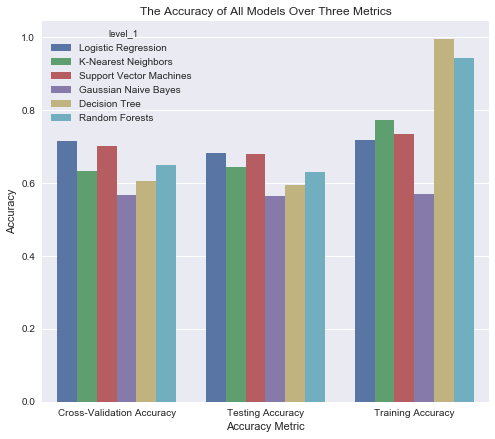

In [35]:
models1 = pd.DataFrame({'Accuracy' : models.unstack()}).reset_index()
# plot accuracies
plt.figure(figsize=(8, 7))
fig_models = sns.barplot(x='level_0', y='Accuracy', hue='level_1', data=models1);
fig_models.set(xlabel='Accuracy Metric', ylabel='Accuracy');
fig_models.set_title('The Accuracy of All Models Over Three Metrics');

Based on the cross-validation and testing accuracies, the two most important metrics in model prediction among the three considered here, the Logistic Regression model yields the best performance. 